In [1]:
import pandas as pd 
import os
import warnings
warnings.filterwarnings('ignore')

os.chdir('/Users/admin/Downloads/EBAC/dataframesEbac')
df = pd.read_csv("TempNY.csv")
df = df.drop('Unnamed: 2', axis = 1)
df.index = df['Year']
df = df.drop('Year', axis = 1)
df.head()

,Average
Year,
1870,53.60
1871,51.13
1872,50.98
1873,50.98
1874,51.34


In [2]:
# Definicion de grupos de prueba y entrenamiento
len_train = int(len(df)* 0.9)
len_test = int(len(df)*0.1)
train = df[0:len_train]
test = df[len_train:]

In [3]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df["Average"])
print("El valor p de la prueba de Dickey-Fuller es:", result[1])

El valor p de la prueba de Dickey-Fuller es: 0.8417172538965356


### Conclusion: No hay evidencia estadistica para rechazar H0 (y por lo tanto decir que la serie es estacionaria)

In [5]:
# Aplicar primeras diferancias
df["temp_change"] = df['Average'].diff()
df = df.dropna()
df.head()

,Average,temp_change
Year,,
1871,51.13,-2.47
1872,50.98,-0.15
1873,50.98,0.00
1874,51.34,0.36
1875,49.43,-1.91


<Axes: xlabel='Year'>

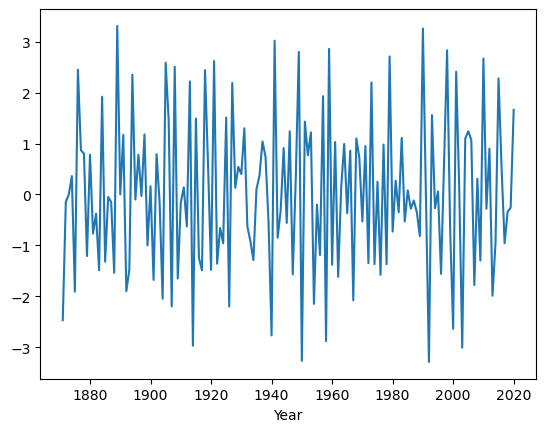

In [6]:
df["temp_change"].plot()

In [7]:
# Aplicacion de la prueba Dickey-Fuller sobre las diferencias
result2 = adfuller(df["temp_change"])
print("El valor p de la pruueba Dickey-fuller es:", result2[1]) # es bueno que el numero sea muy pequeño

El valor p de la pruueba Dickey-fuller es: 8.361907414786667e-14


### Conclusion: La serie transformada de diferencias SI ES ESTACIONARIA

### Estimacion del modelo ARIMA

In [10]:
# Estimacion del modelo ARIMA
from statsmodels.tsa.arima.model import ARIMA

# Ajustar los datos a un modelo AR(1) e imprimir su AIC:
mod_ar1 = ARIMA(df['temp_change'], order = (1, 0, 0))
res_ar1 = mod_ar1.fit()
print('El AIC para AR(1) es:', res_ar1.aic)

El AIC para AR(1) es: 519.9693852277926


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [11]:
# Ajustar los datos a un modelo AR(2) e imprimir su AIC:
mod_ar2 = ARIMA(df['temp_change'], order = (2, 0, 0))
res_ar2 = mod_ar2.fit()
print('El AIC para AR(1) es:', res_ar2.aic)

El AIC para AR(1) es: 510.48447045590717


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [12]:
# Ajustar los datos a un modelo ARIMA(2, 2, 2) e imprimir su AIC:
mod_arma222 = ARIMA(df['temp_change'], order = (2, 2, 2))
res_arma222 = mod_arma222.fit()
print('El AIC para AR(1) es:', res_arma222.aic)

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


El AIC para AR(1) es: 525.7388387757726


In [13]:
# Ajustar los datos a un modelo ARMA(2, 0, 1) e imprimir su AIC:
mod_arma201= ARIMA(df['temp_change'], order = (2, 0, 1))
res_arma201 = mod_arma201.fit()
print('El AIC para AR(1) es:', res_arma201.aic)

El AIC para AR(1) es: 475.6512231553063


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [14]:
# Ajustar los datos a un modelo ARIMA(1, 1, 1) e imprimir su AIC:
mod_ar111 = ARIMA(df['temp_change'], order = (1, 1, 1))
res_ar111 = mod_ar111.fit()
print('El AIC para AR(1) es:', res_ar111.aic)

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


El AIC para AR(1) es: 523.3121443473293


In [15]:
# Ajustar los datos a un modelo ARMA(1, 1) e imprimir su AIC:
mod_arma11 = ARIMA(df['temp_change'], order = (1, 0, 1))
res_arma11 = mod_arma11.fit()
print('El AIC para AR(1) es:', res_arma11.aic)

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


El AIC para AR(1) es: 473.8297271230298


In [16]:
df = pd.read_csv("TempNY.csv")
df = df.drop('Unnamed: 2', axis = 1)
df.index = df['Year']
df = df.drop('Year', axis = 1)
len_train = int(len(df)* 0.9)
len_test = int(len(df)*0.1)
train = df[0:len_train]
test = df[len_train:]

In [17]:
# Ajustar los datos a un modelo ARMA(1, 1) para la base original:
mod_arma11 = ARIMA(df['Average'], order = (1, 0, 1))
res_arma11 = mod_arma11.fit()

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [18]:
# Pronostico puntual de los proximos 5 años
predicciones = res_arma11.forecast(len(test) + 5)
predicciones.tail()

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


167    55.889169
168    55.879787
169    55.870451
170    55.861161
171    55.851916
Name: predicted_mean, dtype: float64

In [19]:
# Pronostico por intervalo de los proximos 5 años
conf = res_arma11.get_forecast(len(test) + 5).conf_int(alpha = 0.05)
conf.tail()

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


,lower Average,upper Average
167,53.217364,58.560974
168,53.189323,58.570252
169,53.161636,58.579266
170,53.134296,58.588026
171,53.107294,58.596538


In [20]:
lista = test.index
lista = pd.DataFrame(lista)

lista2 = []
for i in range(1, 6):
    fecha = 2020 + i
    lista2.append(fecha)
lista2 = pd.DataFrame(lista2, columns = ['Year'])
fechas = pd.concat([lista, lista2], ignore_index=True)
fechas = fechas.reset_index()
fechas.drop(columns = ['index'], inplace = True)
fechas

,Year
0,2005
1,2006
2,2007
3,2008
4,2009
5,2010
6,2011
7,2012
8,2013
9,2014


In [21]:
predicciones = pd.DataFrame(predicciones)
predicciones = predicciones.reset_index()
predicciones.drop(columns = ['index'], inplace = True)
predicciones

,predicted_mean
0,56.045706
1,56.035558
2,56.025461
3,56.015413
4,56.005413
5,55.995463
6,55.985561
7,55.975708
8,55.965903
9,55.956146


In [22]:
frames = [fechas, predicciones]
result = pd.concat(frames, axis = 1, join = 'inner')
result.columns = ['Year', 'Predicciones']
result.index = result['Year']
result.drop(columns = ["Year"], inplace = True)
result

,Predicciones
Year,
2005,56.045706
2006,56.035558
2007,56.025461
2008,56.015413
2009,56.005413
2010,55.995463
2011,55.985561
2012,55.975708
2013,55.965903


In [23]:
conf = conf.reset_index()
conf.drop(columns = ["index"], inplace = True)
frames = [fechas, conf]
intervalos = pd.concat(frames, axis = 1, join = 'inner')
intervalos.index = intervalos['Year']
intervalos.drop(columns = ['Year'], inplace = True)
intervalos

,lower Average,upper Average
Year,,
2005,53.722613,58.368798
2006,53.687409,58.383708
2007,53.652759,58.398162
2008,53.618647,58.412178
2009,53.585054,58.425773
2010,53.551964,58.438962
2011,53.519363,58.451760
2012,53.487236,58.464181
2013,53.455569,58.476238


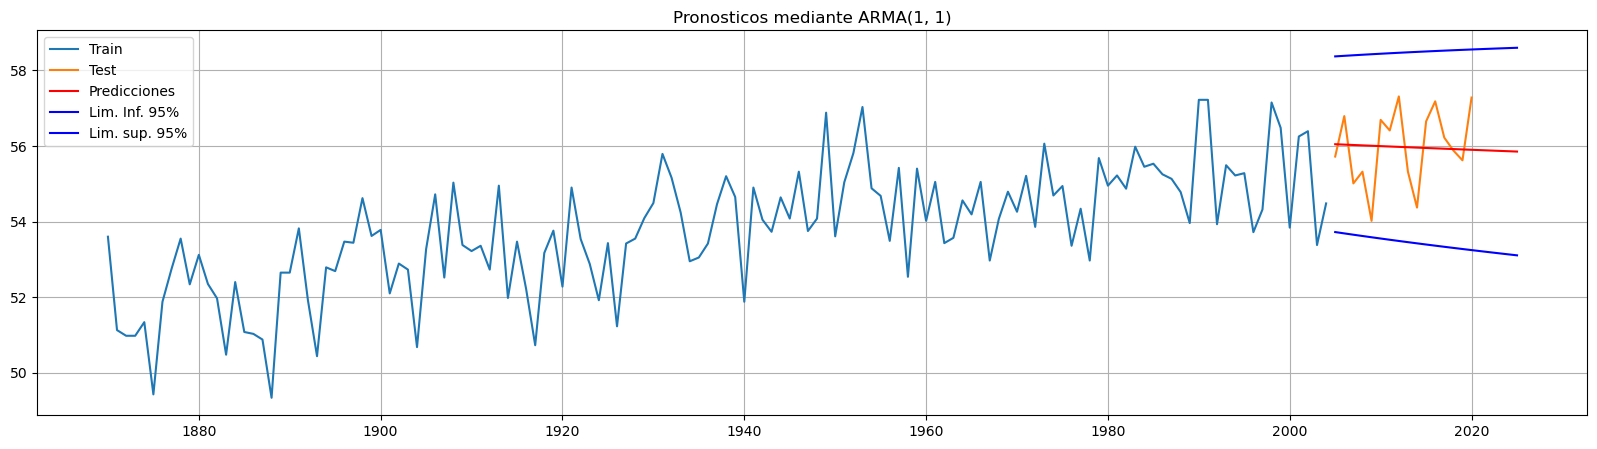

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20, 5))
plt.grid()
plt.plot(train, label = 'Train')
plt.plot(test, label = 'Test')
plt.plot(result, label = "Predicciones", color = 'red')
plt.plot(intervalos["lower Average"], label = "Lim. Inf. 95%", color = 'blue')
plt.plot(intervalos["upper Average"], label = "Lim. sup. 95%", color = 'blue')
plt.legend(loc = 'best')
plt.title("Pronosticos mediante ARMA(1, 1)")
plt.show()